<a href="https://colab.research.google.com/github/evegat/usm2025-1-dip-ia-edu-v2-evegat/blob/main/Proyecto/07prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HITO 3: Validación y prueba del modelo entrenado


Este notebook evalúa el desempeño de los modelos de clasificación entrenados en el hito anterior. Compararemos los resultados sobre los datos de entrenamiento y testeo para detectar posibles signos de sobreajuste (overfitting) y usaremos métricas propias de clasificación: accuracy, precision, recall, F1-score y matriz de confusión.

En este análisis se consideran los modelos Decision Tree y Random Forest, usando los mismos datos preprocesados previamente.


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset
url = 'https://github.com/evegat/usm2025-1-dip-ia-edu-v2-evegat/raw/main/Proyecto/01database.csv.gz'
df = pd.read_csv(url, compression='gzip')

# Preprocesamiento general
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Codificación de región
df['region_sede'] = df['region_sede'].astype(str)
df['region_sede_cod'] = LabelEncoder().fit_transform(df['region_sede'])

# Normalización
columnas_numericas = ['valor_matricula', 'valor_arancel']
df[columnas_numericas] = MinMaxScaler().fit_transform(df[columnas_numericas])

# Variable objetivo
df['es_pedagogia'] = df['nomb_carrera'].str.contains('PEDAGOG', case=False, na=False).astype(int)

# Variables predictoras
X = df[['gen_alu', 'rango_edad', 'region_sede_cod', 'tipo_inst_1', 'modalidad',
        'jornada', 'nivel_carrera_1', 'forma_ingreso', 'acreditada_carr',
        'valor_matricula', 'valor_arancel']].copy()
y = df['es_pedagogia']

# Codificación de variables categóricas
for col in X.select_dtypes(include='object').columns:
    X.loc[:, col] = LabelEncoder().fit_transform(X[col].astype(str))

# Separación entrenamiento/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Evaluación del modelo: Árbol de Decisión

Evaluamos ahora el desempeño del modelo de Árbol de Decisión en entrenamiento y testeo para identificar posibles signos de sobreajuste.


In [10]:
modelo_dt = DecisionTreeClassifier(max_depth=4, random_state=42)
modelo_dt.fit(X_train, y_train)

y_train_pred = modelo_dt.predict(X_train)
y_test_pred = modelo_dt.predict(X_test)

print(" Accuracy en entrenamiento:", accuracy_score(y_train, y_train_pred))
print(" Accuracy en testeo:", accuracy_score(y_test, y_test_pred))
print("\nReporte en conjunto de prueba:")
print(classification_report(y_test, y_test_pred))


 Accuracy en entrenamiento: 0.9590755057887513
 Accuracy en testeo: 0.9588393120240698

Reporte en conjunto de prueba:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     59006
           1       0.76      0.75      0.76      5473

    accuracy                           0.96     64479
   macro avg       0.87      0.87      0.87     64479
weighted avg       0.96      0.96      0.96     64479



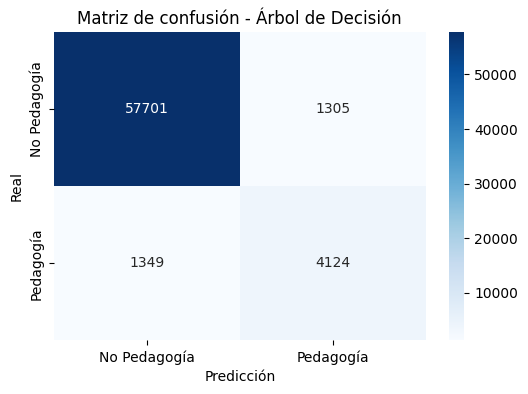

In [7]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Pedagogía', 'Pedagogía'],
            yticklabels=['No Pedagogía', 'Pedagogía'])
plt.title("Matriz de confusión - Árbol de Decisión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


## Evaluación del modelo: Random Forest

Repetimos el proceso anterior con el modelo Random Forest, comparando los resultados de entrenamiento y prueba.


In [11]:
modelo_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
modelo_rf.fit(X_train, y_train)

y_train_pred_rf = modelo_rf.predict(X_train)
y_test_pred_rf = modelo_rf.predict(X_test)

print("Accuracy en entrenamiento (RF):", accuracy_score(y_train, y_train_pred_rf))
print("Accuracy en testeo (RF):", accuracy_score(y_test, y_test_pred_rf))
print("\nReporte en conjunto de prueba:")
print(classification_report(y_test, y_test_pred_rf))


Accuracy en entrenamiento (RF): 0.9699667330970789
Accuracy en testeo (RF): 0.9691992741822919

Reporte en conjunto de prueba:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     59006
           1       0.85      0.77      0.81      5473

    accuracy                           0.97     64479
   macro avg       0.92      0.88      0.90     64479
weighted avg       0.97      0.97      0.97     64479



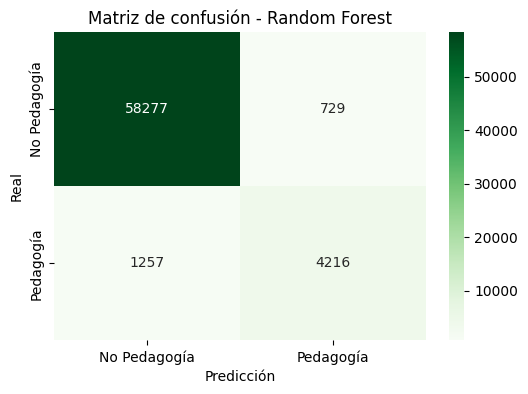

In [9]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred_rf), annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Pedagogía', 'Pedagogía'],
            yticklabels=['No Pedagogía', 'Pedagogía'])
plt.title("Matriz de confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


## Conclusiones

El modelo `Random Forest` presentó mejor desempeño que el `Árbol de Decisión`, especialmente en la clase minoritaria (estudiantes de Pedagogía), con mejor precisión y recall. Además, su rendimiento en testeo se aproxima al del entrenamiento, lo que sugiere menor sobreajuste.

Ambos modelos son interpretables, pero `Random Forest` muestra mayor robustez. Esto lo convierte en una buena opción si el objetivo es identificar correctamente a quienes eligen pedagogía.

Si se desea seguir optimizando, se pueden ajustar hiperparámetros como `max_depth`, `min_samples_leaf` o probar métodos como `GridSearchCV`.
